In [46]:
import numpy as np
import cv2 as cv
from utilities import funcs
from matplotlib import pyplot as plt

In [47]:
#figure size
plt.rcParams['figure.figsize'] = [12,5]

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

#default colormap
plt.rc('image', cmap='plasma')

In [48]:
#useful definitions and quantities

dx = 0.065
bound_up = dx*1400

def plot_custom(img,title):
    fig= plt.figure()
    ax = fig.gca()
    ax.set_ylabel("$\mu m$")
    ax.set_xlabel("$\mu m$")
    pos = ax.imshow(img, extent = [0,bound_up,0,bound_up])
    fig.colorbar(pos, ax=ax)
    pos.set_clim(0,1)
    plt.title(title)

def plot_custom_double(img1,img2,title, title1="RFP", title2="CY5",clim1=[0,1200],clim2=[0,5]):
    fig, (ax1,ax2) = plt.subplots(1,2)

    fig.suptitle(title)

    pos1 = ax1.imshow(img1,extent = [0,bound_up,0,bound_up])
    pos1.set_clim(clim1)
    fig.colorbar(pos1, ax=ax1)
    ax1.set_title(title1)
    ax1.set_ylabel("$\mu m$")
    ax1.set_xlabel("$\mu m$")

    pos2 = ax2.imshow(img2,extent = [0,bound_up,0,bound_up])
    pos2.set_clim(clim2)
    fig.colorbar(pos2, ax=ax2)
    ax2.set_title(title2)
    ax2.set_ylabel("$\mu m$")
    ax2.set_xlabel("$\mu m$")


# Import

In [49]:
## Img 1 Confocal
#tuple import
cv_img_1_con_RFP = cv.imreadmulti('Data/1/confocal/1RFP.TIF', flags=2)[1]
cv_img_1_con_CY5 = cv.imreadmulti('Data/1/confocal/1CY5.TIF', flags=2)[1]

# Img 1 superresoluted
#tuple import
cv_img_1_str_RFP = cv.imreadmulti('Data/1/super_resolution/1RFP.TIF', flags=2)[1]
cv_img_1_str_CY5 = cv.imreadmulti('Data/1/super_resolution/1CY5.TIF', flags=2)[1]

## Img 2 Confocal
#tuple import
cv_img_2_con_RFP = cv.imreadmulti('Data/2/confocal/2RFP.TIF', flags=2)[1]
cv_img_2_con_CY5 = cv.imreadmulti('Data/2/confocal/2CY5.TIF', flags=2)[1]

## Img 2 superresoluted
#tuple import
cv_img_2_str_RFP = cv.imreadmulti('Data/2/super_resolution/3_VCS_w1VCS_100X_RFP.TIF', flags=2)[1]
cv_img_2_str_CY5 = cv.imreadmulti('Data/2/super_resolution/3_VCS_w2VCS_100X_CY5.TIF', flags=2)[1]

In [50]:
N_layers = len(cv_img_1_str_RFP)
print("Layers number:", N_layers)
n_img = 16

Layers number: 19


# Method 1

## Image 1

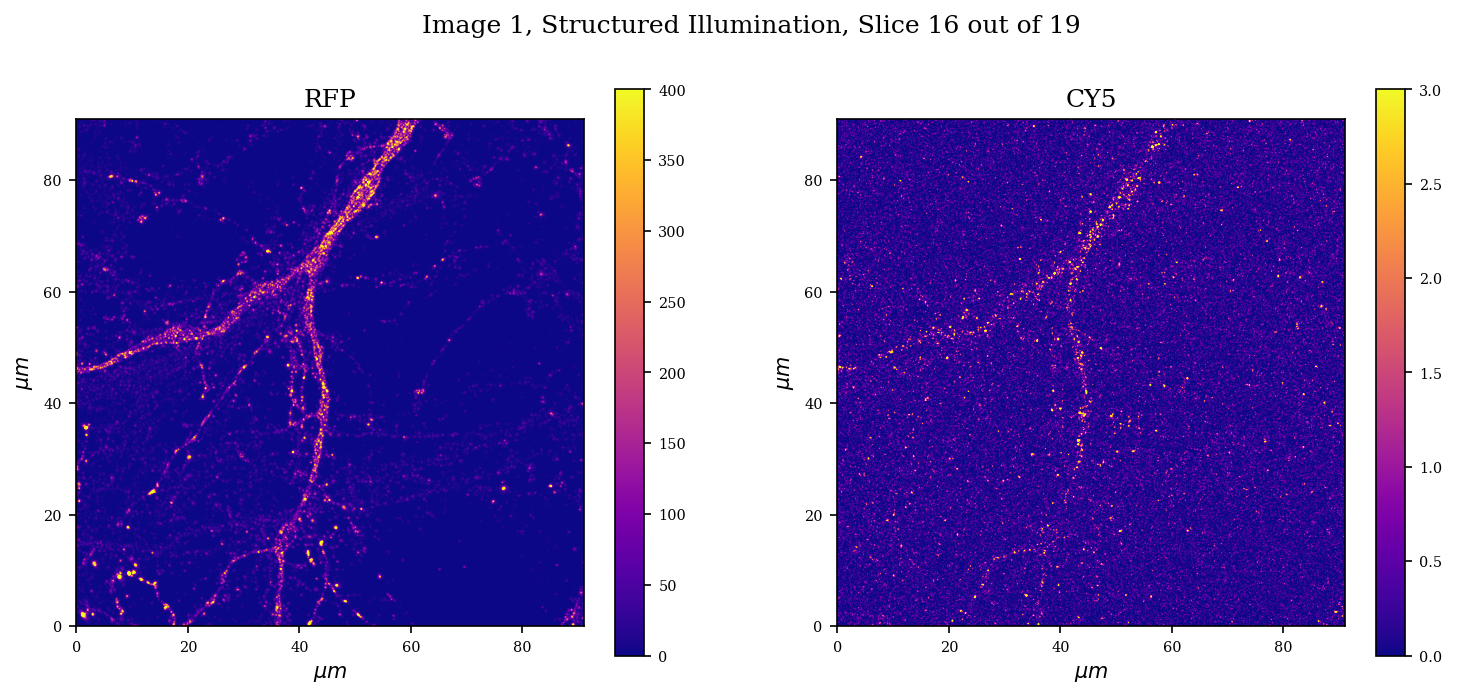

In [51]:
N_layers = len(cv_img_1_str_RFP)
n_img = 15
prefix = "img/img1"

plot_custom_double(cv_img_1_str_RFP[n_img],cv_img_1_str_CY5[n_img],
                 "Image 1, Structured Illumination, Slice " + str(n_img+1) + " out of " + str(N_layers),
                 clim1=[0,400],clim2=[0,3])

plt.savefig("img/basic.png")

In [52]:
img = cv_img_1_str_RFP[n_img]

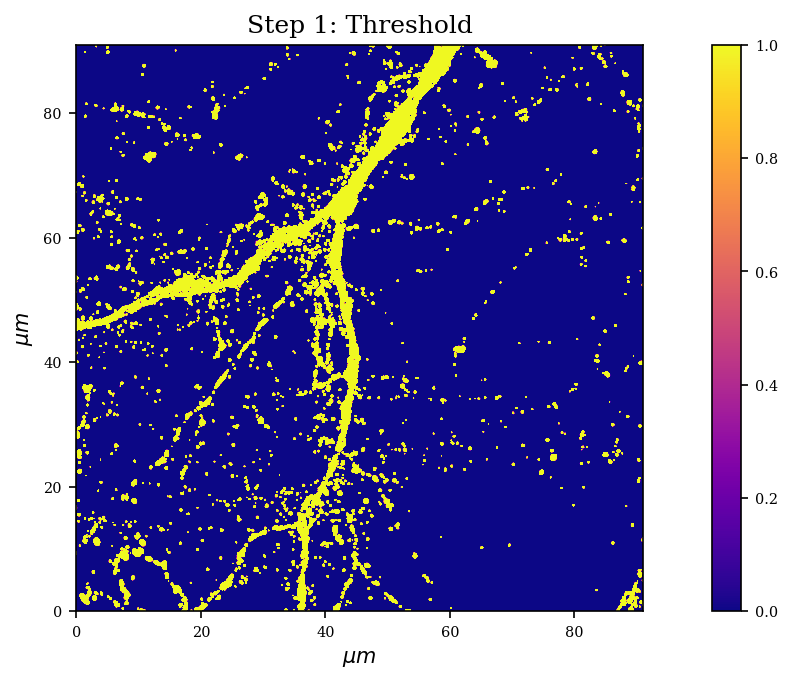

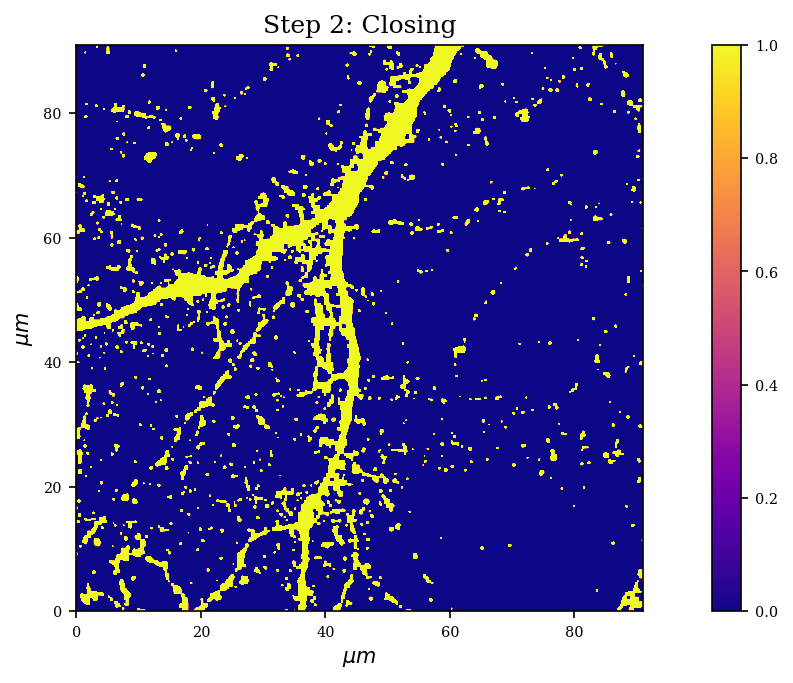

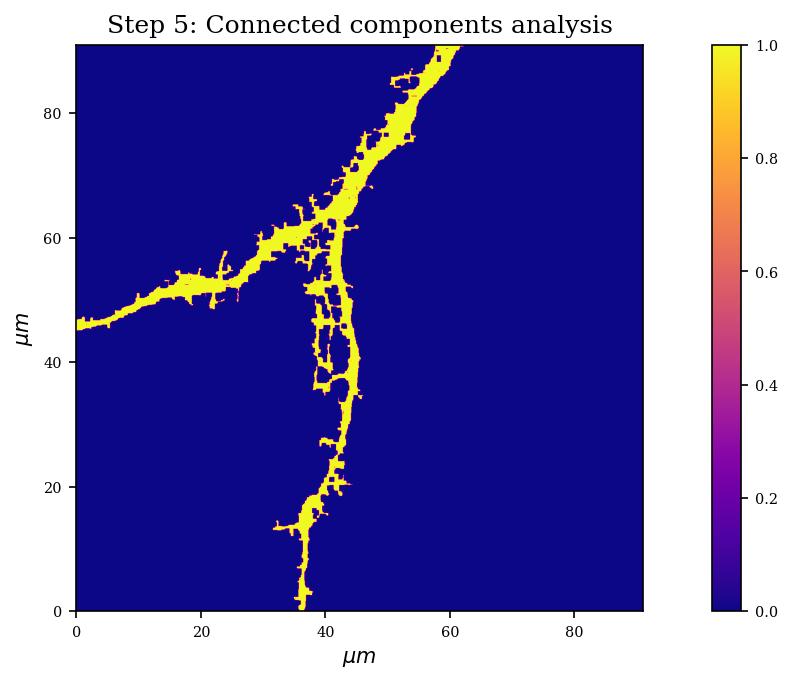

In [53]:
ret,temp_img = cv.threshold(img,60,1,cv.THRESH_TOZERO)

plot_custom(temp_img,"Step 1: Threshold")
plt.savefig(prefix+"/threshold.png")

kernel_cl1 = np.ones((10,10),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_CLOSE, kernel_cl1)

plot_custom(temp_img,"Step 2: Closing")
plt.savefig(prefix+"/closure.png")


"""
kernel_op1 = np.ones((6,6),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_OPEN, kernel_op1)

plot_custom(temp_img,"Step 3: Opening")
plt.savefig(prefix+"/opening.png")

ret,final_img = cv.threshold(temp_img,20,1,cv.THRESH_BINARY)

plot_custom(final_img,"Step 4: Thresholding")
plt.savefig(prefix+"/thresholding.png")
"""

final_component = funcs.get_biggest_object(temp_img)

plot_custom(final_component,"Step 5: Connected components analysis")
plt.savefig(prefix+"/connected.png")



final_processed = final_component * img

filtered_negative = (1-final_processed) *  cv_img_1_str_RFP[n_img]


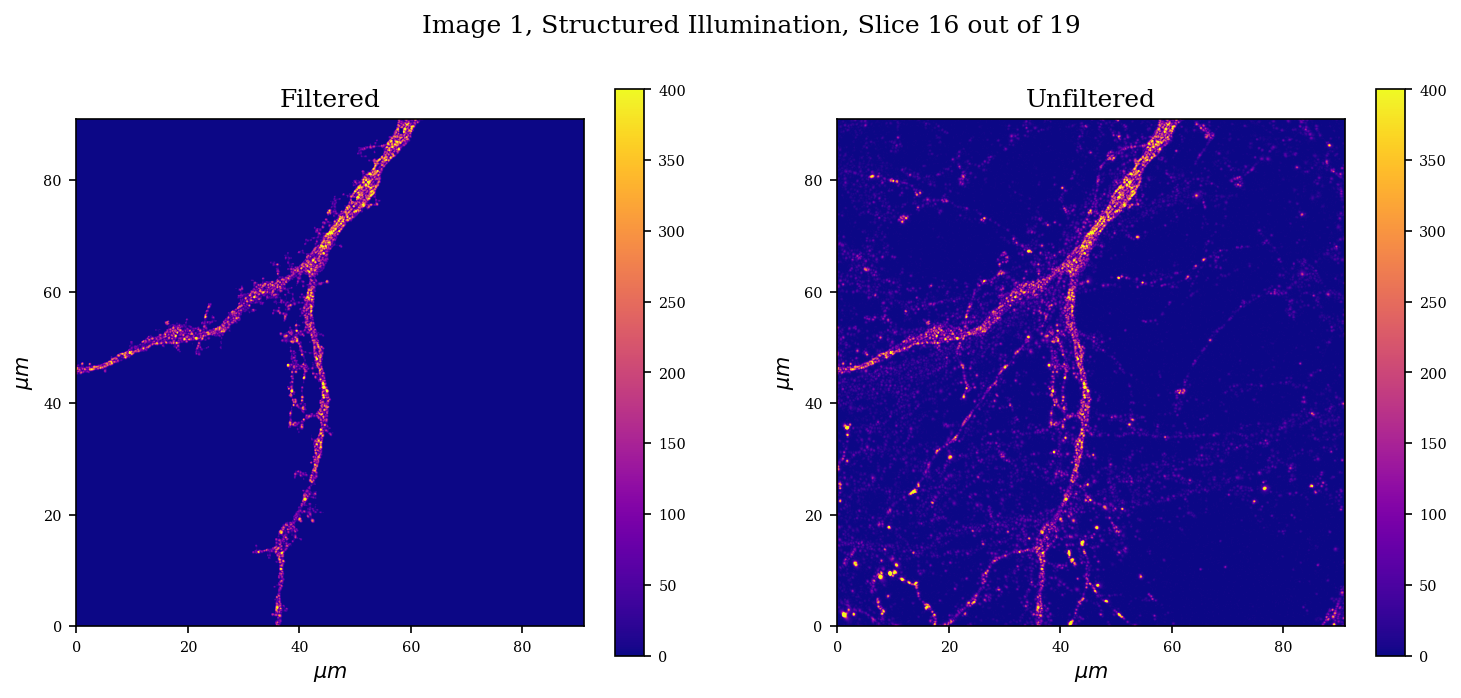

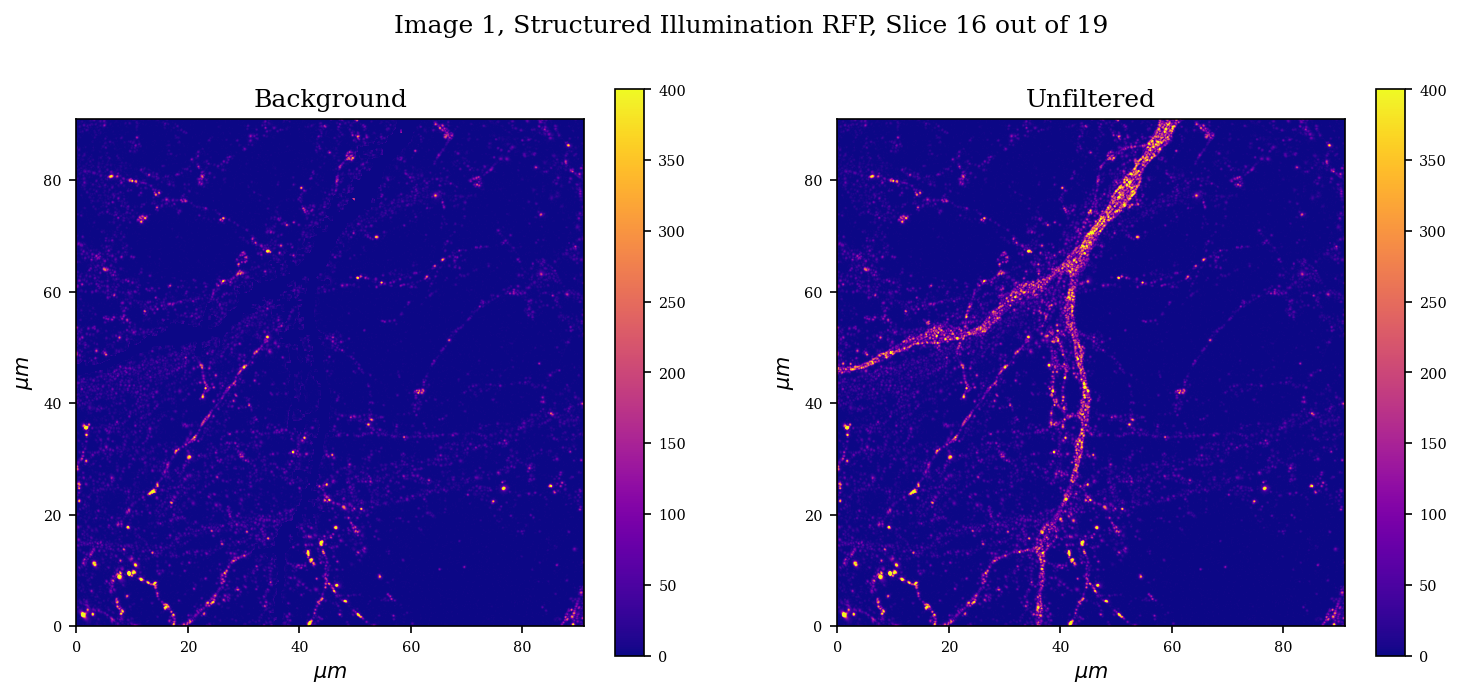

In [54]:
plot_custom_double(final_processed,cv_img_1_str_RFP[n_img],
                 "Image 1, Structured Illumination, Slice " + str(n_img+1) + " out of " + str(N_layers),
                 title1="Filtered",
                 title2="Unfiltered",
                 clim1=[0,400],clim2=[0,400])
plt.savefig(prefix+"/Filtered_compare.png")


plot_custom_double(filtered_negative,cv_img_1_str_RFP[n_img],
                 "Image 1, Structured Illumination RFP, Slice " + str(n_img+1) + " out of " + str(N_layers),
                 title1="Background",
                 title2="Unfiltered",
                 clim1=[0,400],clim2=[0,400])

plt.savefig(prefix+"/Background_compare.png")

## Cycle

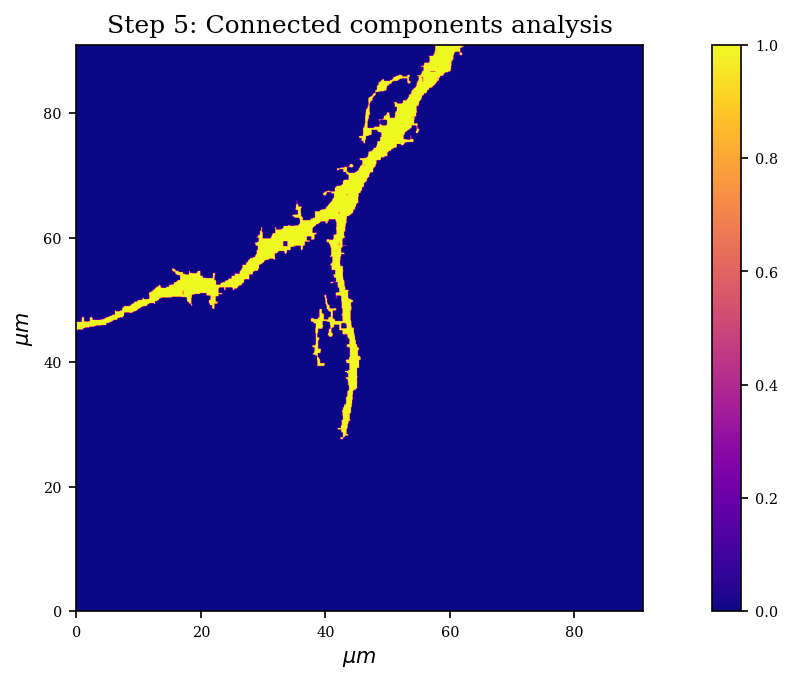

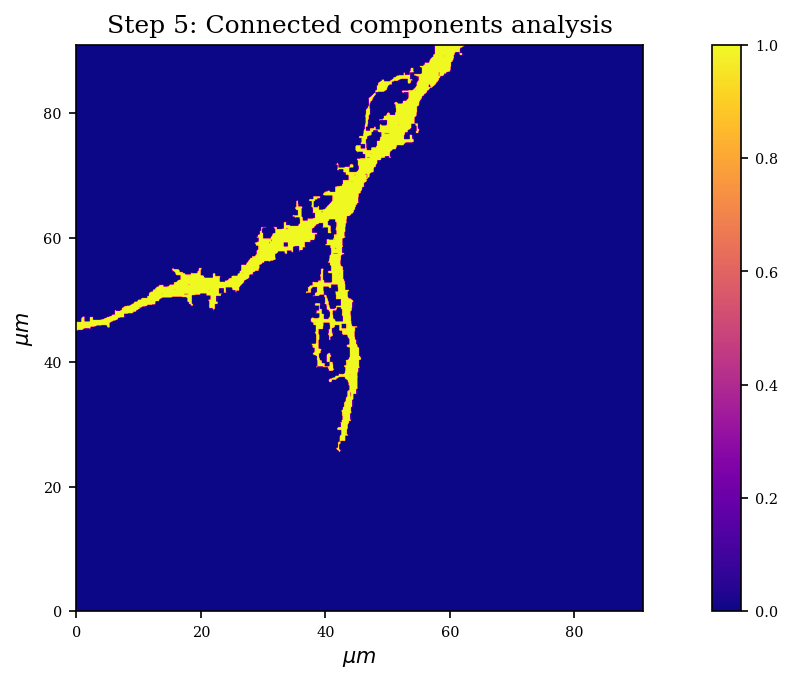

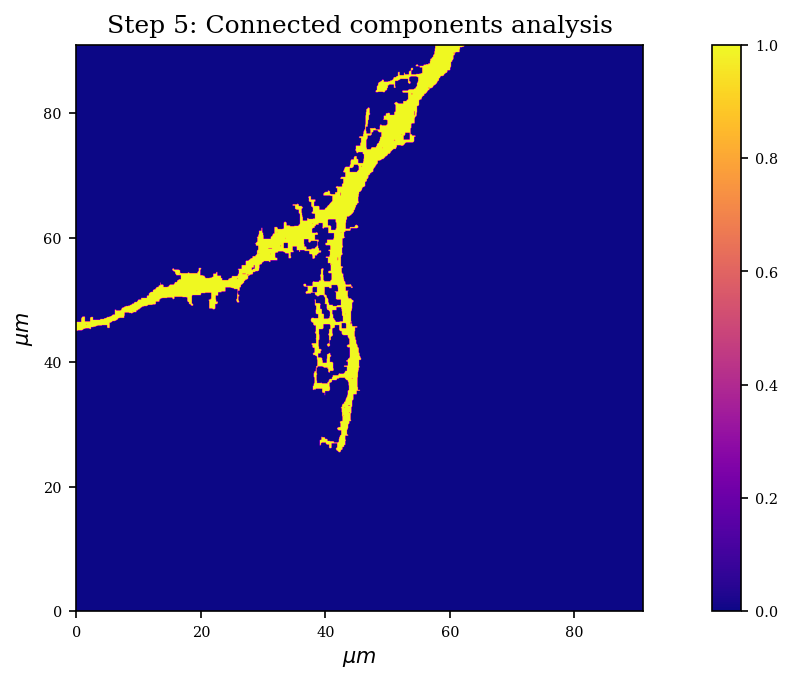

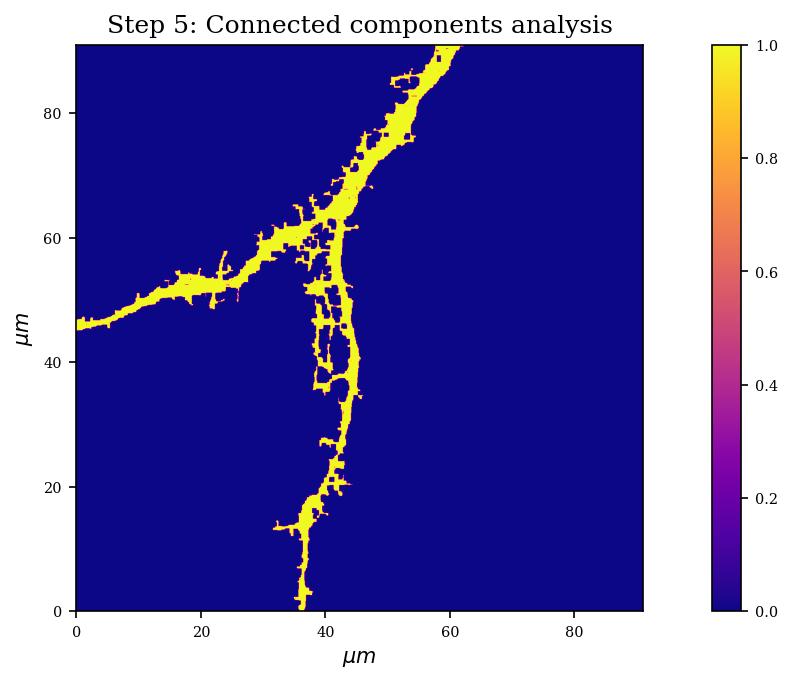

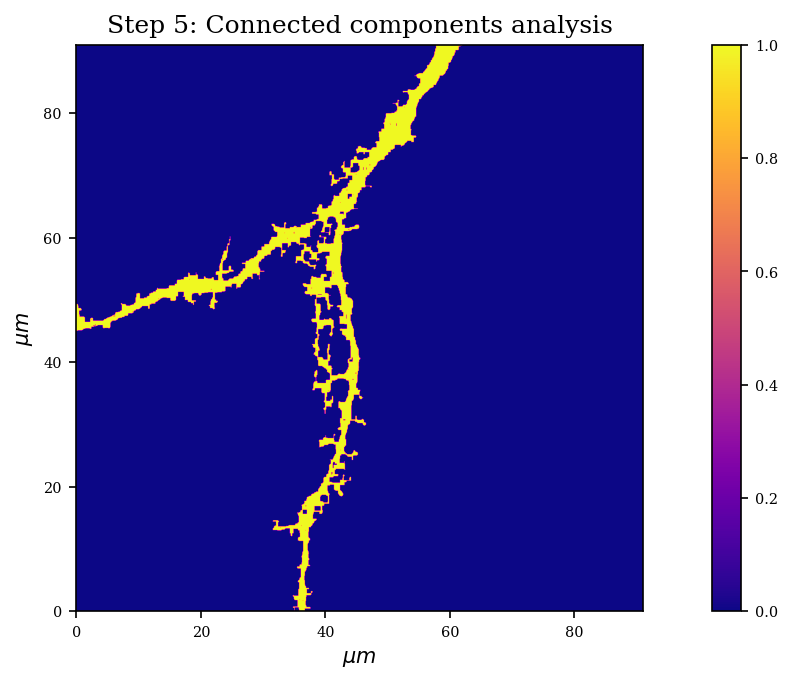

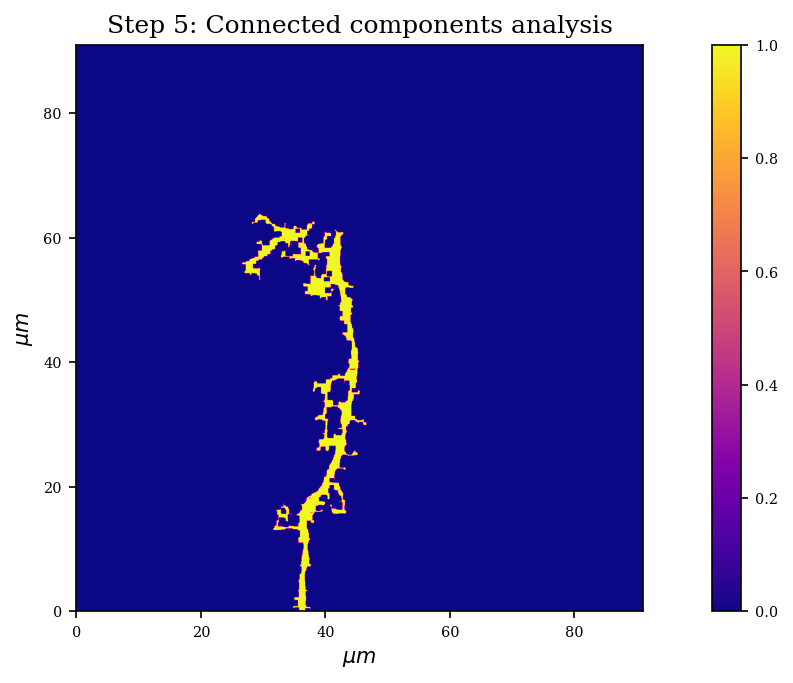

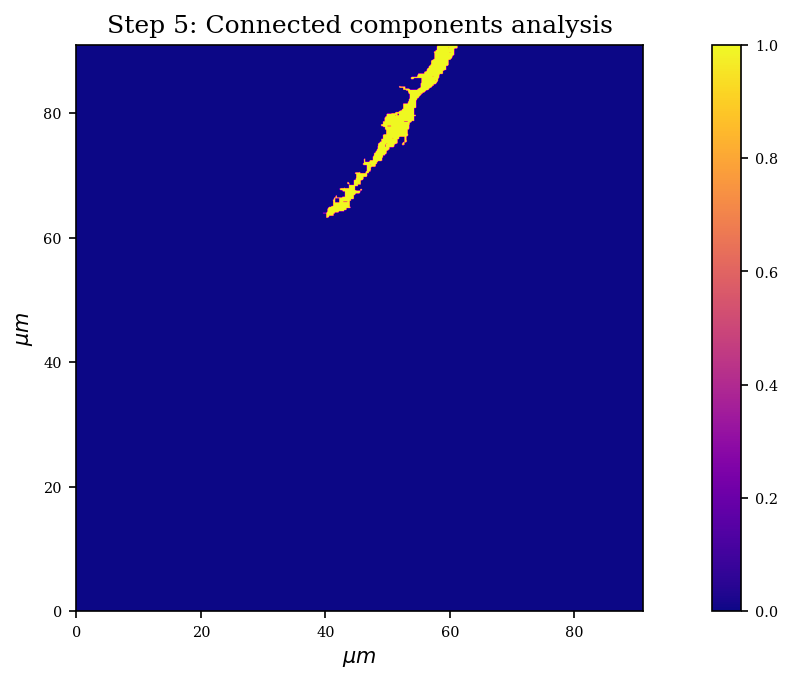

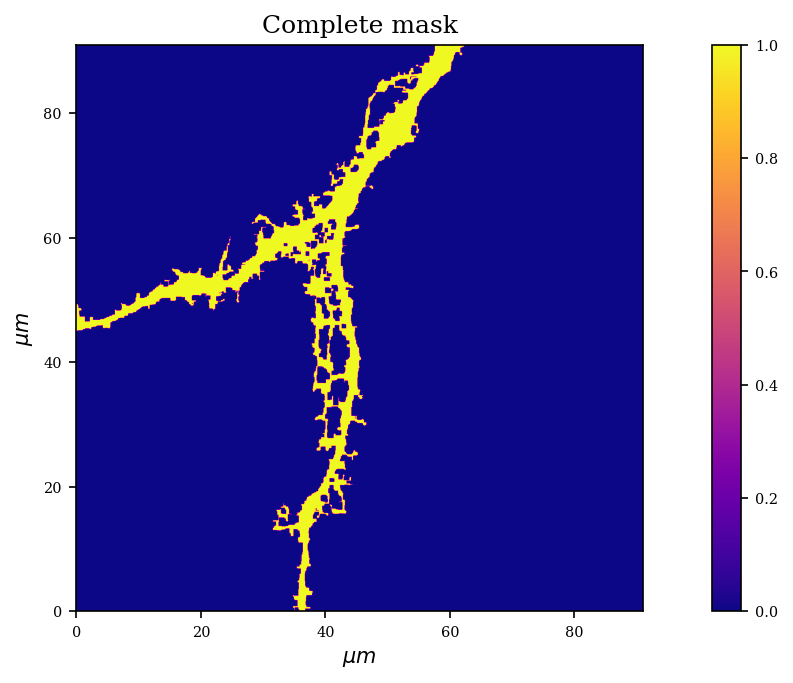

In [55]:
accumulator_mask = np.zeros(np.shape(cv_img_1_str_RFP[15]))

for ii in range(12,19):
    img = cv_img_1_str_RFP[ii]
    
    ret,temp_img = cv.threshold(img,60,1,cv.THRESH_TOZERO)

    kernel_cl1 = np.ones((10,10),np.uint8)
    temp_img = cv.morphologyEx(temp_img, cv.MORPH_CLOSE, kernel_cl1)

    mask = funcs.get_biggest_object(temp_img)

    plot_custom(mask,"Step 5: Connected components analysis")
    plt.savefig(prefix+"/connected.png")

    accumulator_mask = np.logical_or(mask, accumulator_mask)


plot_custom(accumulator_mask,"Complete mask")
plt.savefig(prefix+"/accumulator.png")

final_processed = accumulator_mask * cv_img_1_str_RFP[n_img]

filtered_negative = (1-accumulator_mask) *  cv_img_1_str_RFP[n_img]




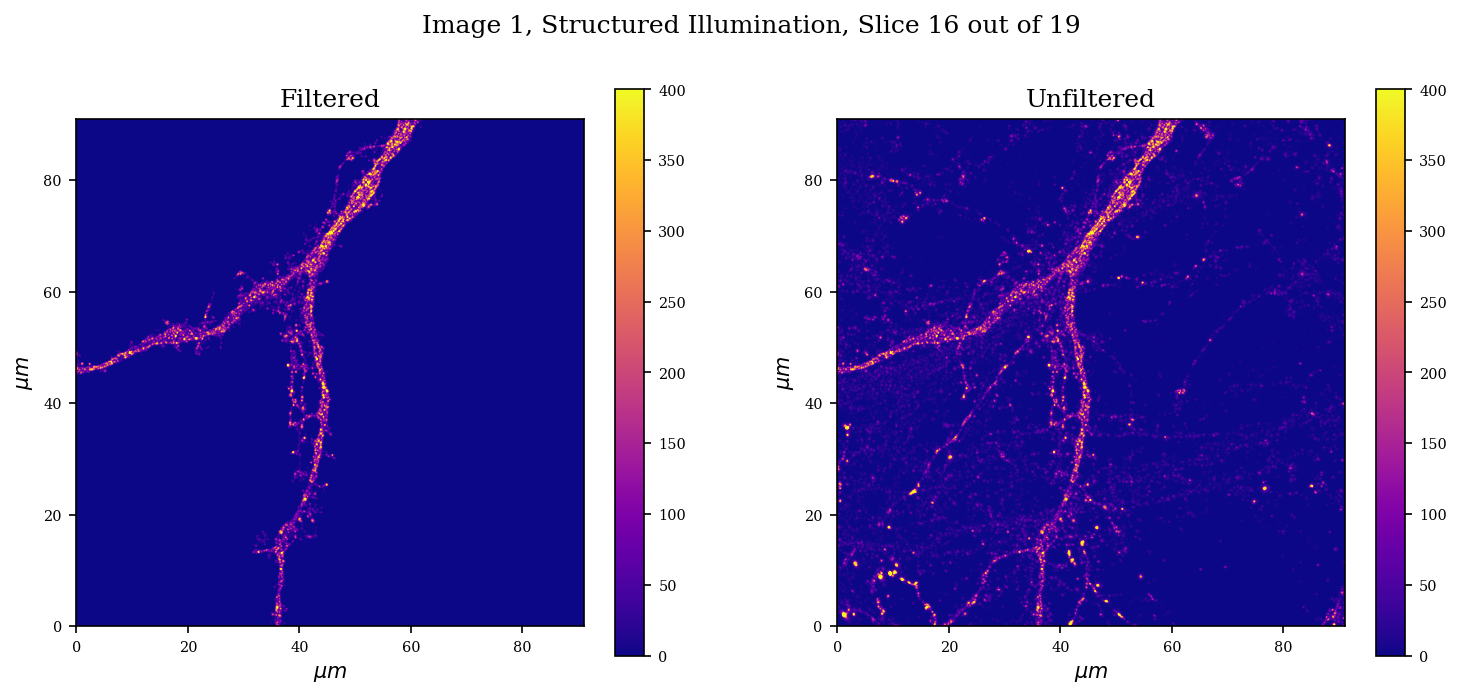

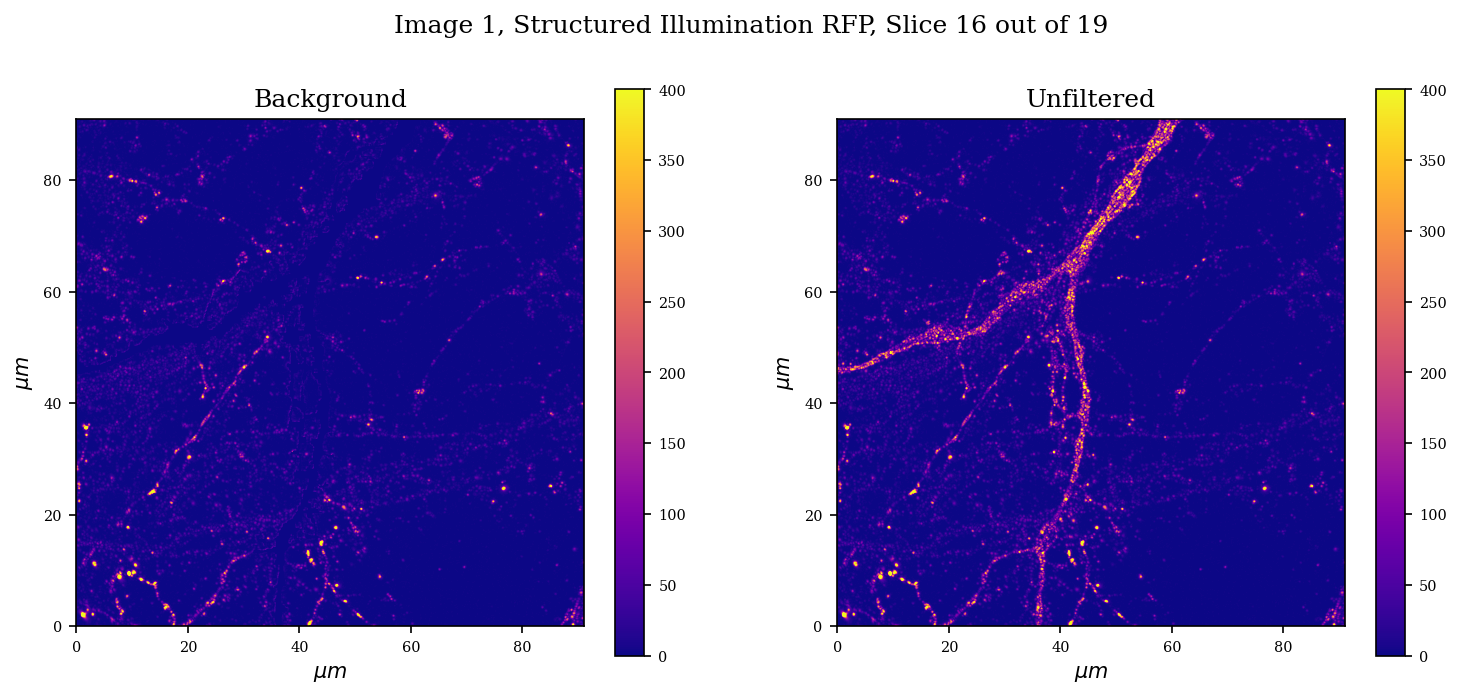

In [56]:
plot_custom_double(final_processed,cv_img_1_str_RFP[n_img],
                 "Image 1, Structured Illumination, Slice " + str(n_img+1) + " out of " + str(N_layers),
                 title1="Filtered",
                 title2="Unfiltered",
                 clim1=[0,400],clim2=[0,400])
plt.savefig(prefix+"/Filtered_compare_cycle.png")


plot_custom_double(filtered_negative,cv_img_1_str_RFP[n_img],
                 "Image 1, Structured Illumination RFP, Slice " + str(n_img+1) + " out of " + str(N_layers),
                 title1="Background",
                 title2="Unfiltered",
                 clim1=[0,400],clim2=[0,400])

plt.savefig(prefix+"/Background_compare_cycle.png")

## Image 2

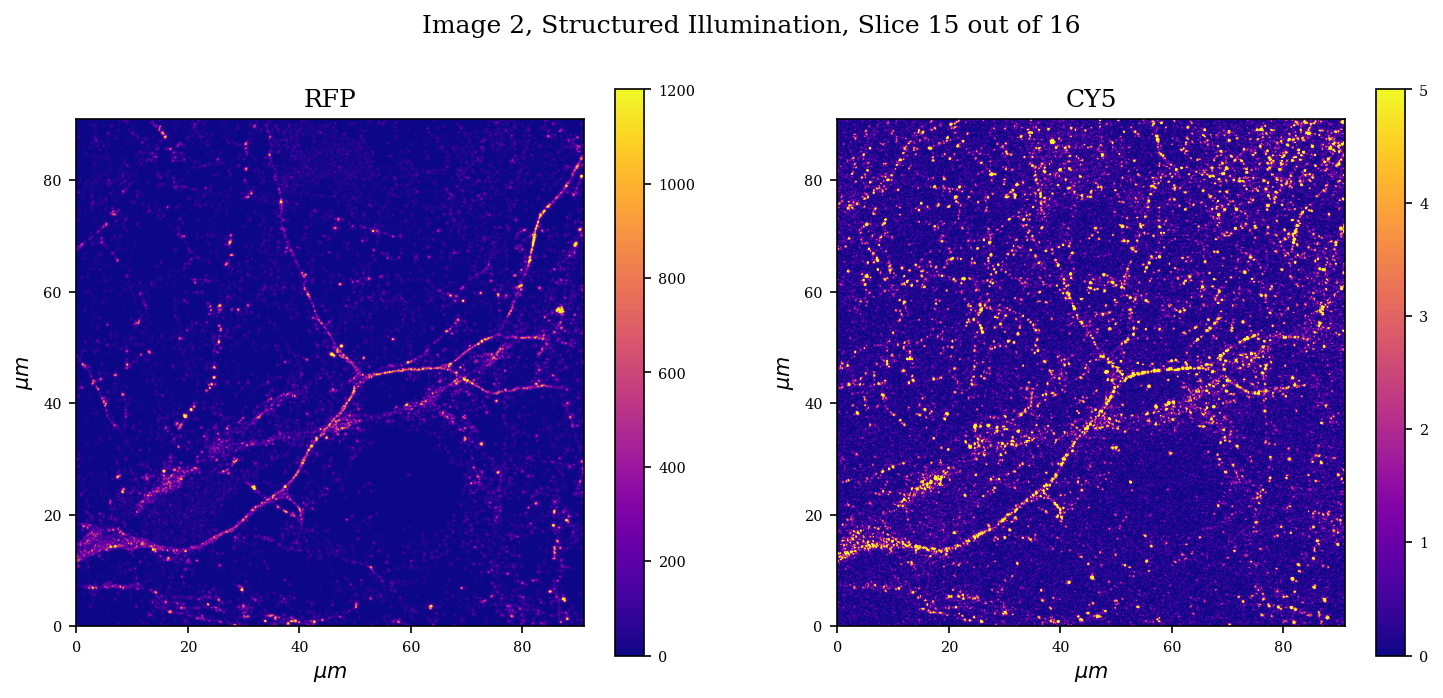

In [57]:
N_layers = len(cv_img_2_str_RFP)
n_img = 14
prefix="img/img2"

plot_custom_double(cv_img_2_str_RFP[n_img],cv_img_2_str_CY5[n_img],
                 "Image 2, Structured Illumination, Slice " + str(n_img+1) + " out of " + str(N_layers))

plt.savefig(prefix+"/basic.png")


In [58]:
img = cv_img_2_str_RFP[n_img]

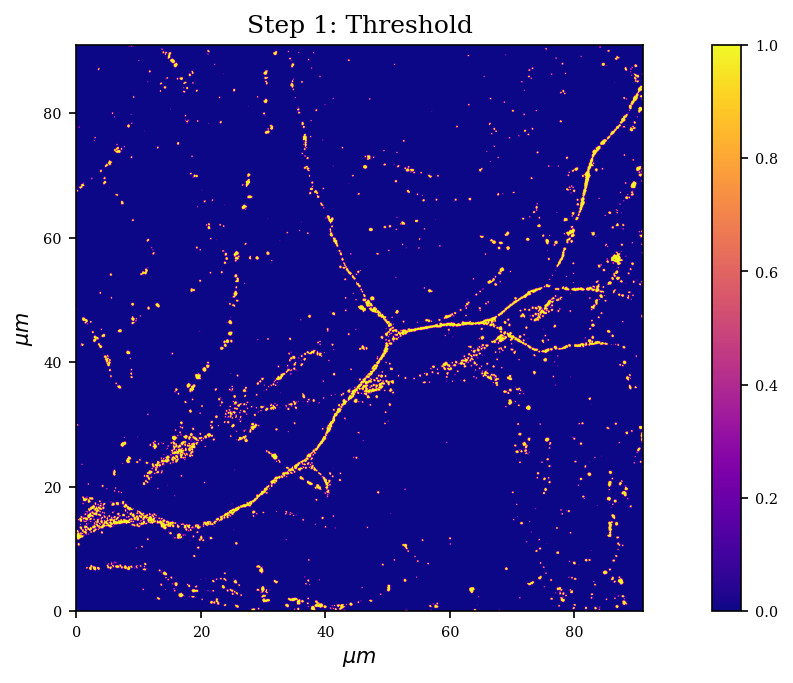

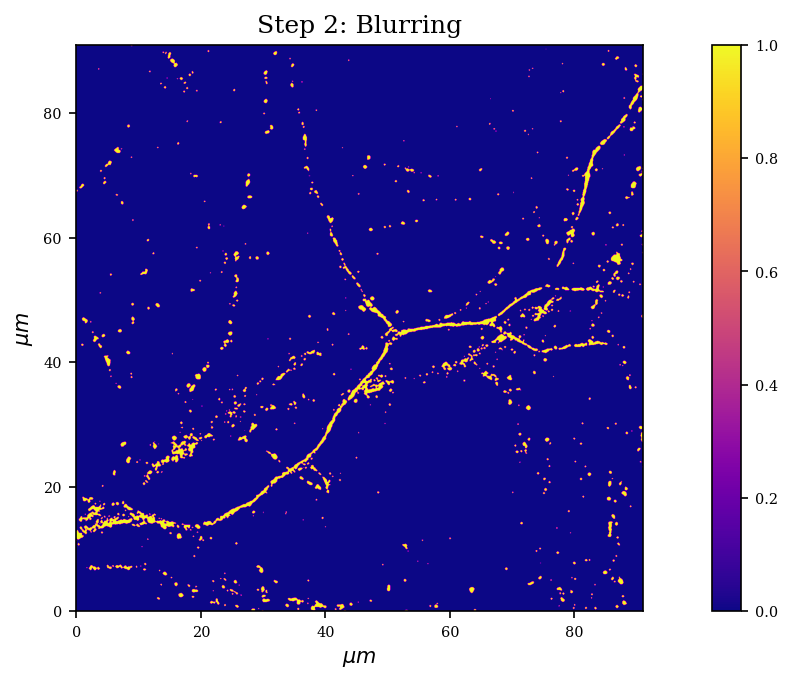

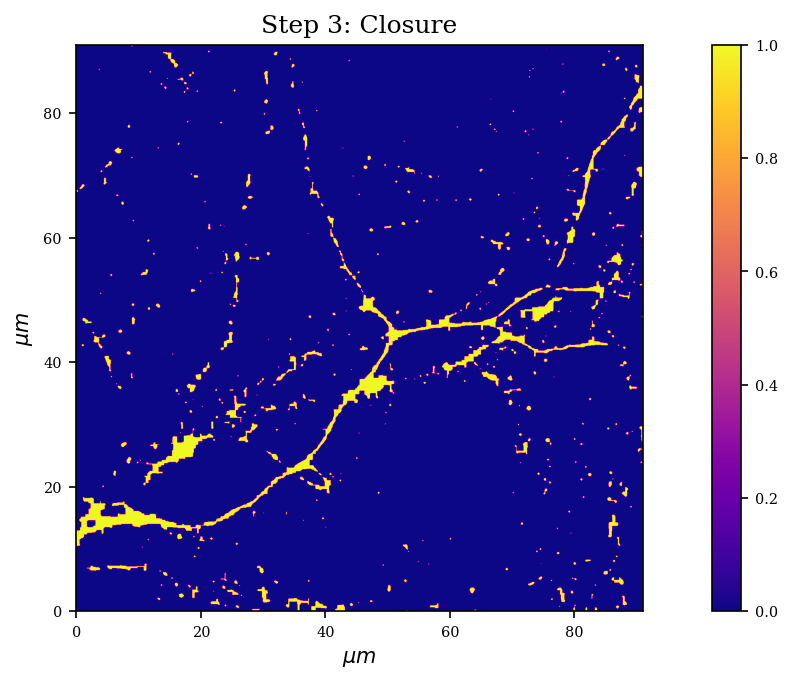

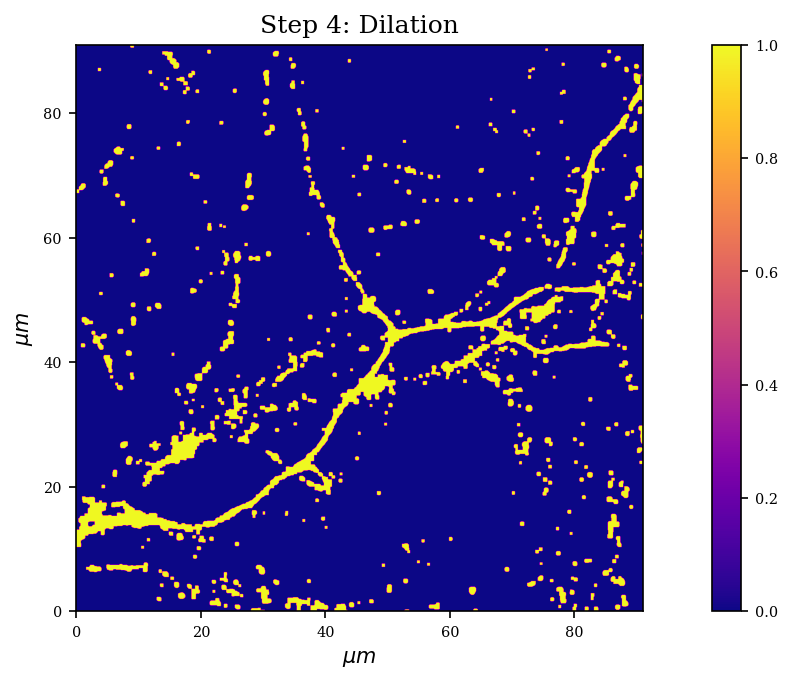

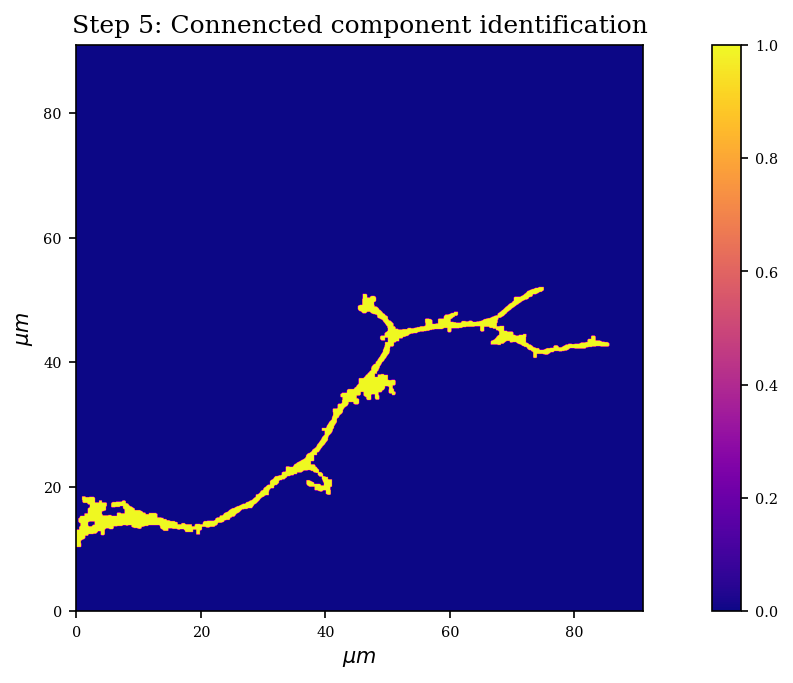

In [59]:
ret,temp_img = cv.threshold(img, 250, 1, cv.THRESH_BINARY)

plot_custom(temp_img,"Step 1: Threshold")
plt.savefig(prefix+"/threshold.png")

#median blurring
temp_img = cv.medianBlur(temp_img,5)

plot_custom(temp_img,"Step 2: Blurring")
plt.savefig(prefix+"/medianblur.png")


#Closure
kernel_cl1 = np.ones((12,12),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_CLOSE, kernel_cl1)

plot_custom(temp_img,"Step 3: Closure")
plt.savefig(prefix+"/closure.png")

#Dilation
kernel_dil = np.ones((6,6),np.uint8)
temp_img = cv.dilate(temp_img,kernel_dil,iterations = 1)

plot_custom(temp_img,"Step 4: Dilation")
plt.savefig(prefix+"/dilation.png")

#Connected component analysis
final_component = funcs.get_biggest_object(temp_img)

plot_custom(final_component,"Step 5: Connencted component identification")
plt.savefig(prefix+"/connected.png")


final_processed = final_component * img

filtered_negative = (1-final_processed) *  cv_img_2_str_RFP[n_img]


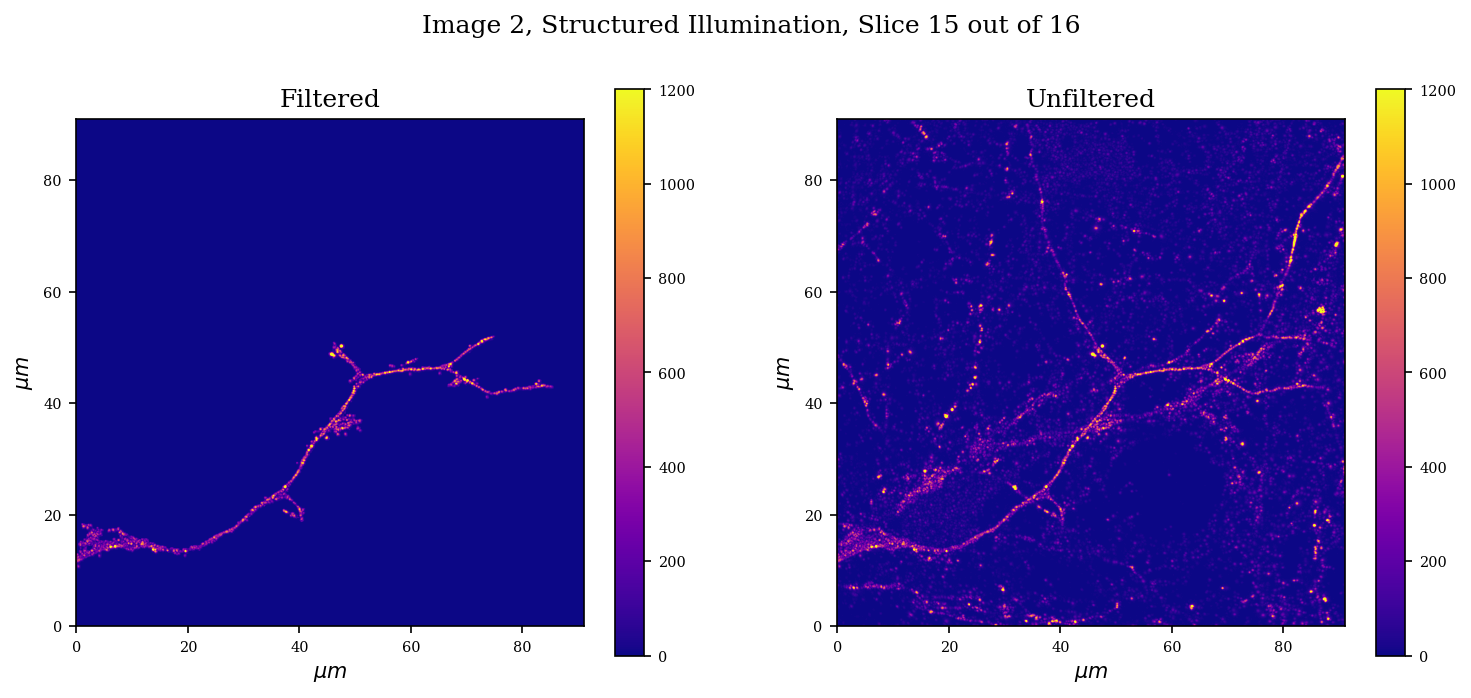

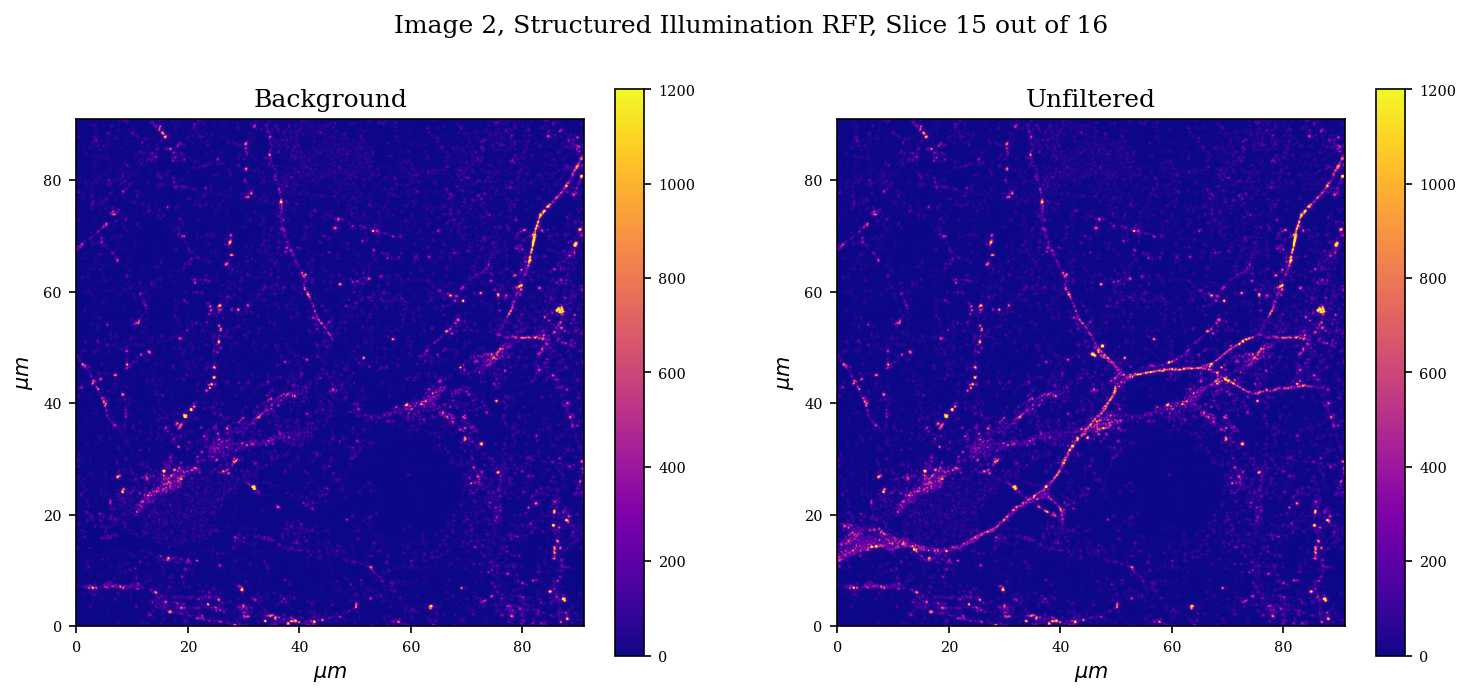

In [60]:
plot_custom_double(final_processed,cv_img_2_str_RFP[n_img],
                 "Image 2, Structured Illumination, Slice " + str(n_img+1) + " out of " + str(N_layers),
                 title1="Filtered",
                 title2="Unfiltered",
                 clim2=[0,1200])
plt.savefig(prefix+"/Filtered_compare.png")


plot_custom_double(filtered_negative,cv_img_2_str_RFP[n_img],
                 "Image 2, Structured Illumination RFP, Slice " + str(n_img+1) + " out of " + str(N_layers),
                 title1="Background",
                 title2="Unfiltered",
                 clim2=[0,1200])

plt.savefig(prefix+"/Background_compare.png")


# Method 2

## Image 1

## Image 2